In [1]:
"""
Submission Machine Learning untuk Pemula

Data Diri (Profil) : 

Nama Lenkgap : Muhammad Asthi Seta Ari Yuwana
username : asthiseta
email : asthiseta@gmail.com
"""

'\nSubmission Machine Learning untuk Pemula\n\nData Diri (Profil) : \n\nNama Lenkgap : Muhammad Asthi Seta Ari Yuwana\nusername : asthiseta\nemail : asthiseta@gmail.com\n'

In [2]:
"""memeriksa (memastikan) versi tensorflow di google colab"""
#import tensorflow as tf
#print(tf.__version__) # 2.4.1

""" Tempat Import Library yang dibutuhkan """
from google.colab import files
import zipfile
import os
import numpy as np
#from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.applications
import matplotlib.image as mpimg
import shutil
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
"""Downloading datasets"""
#"""
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip
#import Zipfile
#"""

--2021-04-14 12:38:09--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.89MB/s    in 41s     

2021-04-14 12:38:51 (7.60 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
zip = '/tmp/rockpaperscissors.zip'
#extracting the zip file
Zip = zipfile.ZipFile(zip, 'r')
Zip.extractall('/tmp')
Zip.close()


In [5]:
""" checking """
#print(os.listdir('/tmp/rockpaperscissors')) #['paper', 'scissors', 'rock', 'README_rpc-cv-images.txt', 'rps-cv-images']
#print(len(os.listdir('/tmp/rockpaperscissors/rock'))) #726
#print(len(os.listdir('/tmp/rockpaperscissors/paper'))) #712
#print(len(os.listdir('/tmp/rockpaperscissors/scissors'))) #750


' checking '

In [6]:
""" Membuat variable variable directory """
Base = '/tmp/rockpaperscissors'
Train = os.path.join(Base, 'train')
Validation = os.path.join(Base, 'val')



# membuat direktorinya
os.makedirs(Train, exist_ok=True)
os.makedirs(Validation, exist_ok=True)


In [7]:
""" direktori untuk masing masing kategori """
Kertas = os.path.join(Base,'paper')
Batu = os.path.join(Base, 'rock')
Gunting = os.path.join(Base, 'scissors')

""" Splitting each rain and validation data in each directory"""

training_dir_paper, val_dir_paper = train_test_split(os.listdir(Kertas), test_size=0.4)

training_dir_rock, val_dir_rock = train_test_split(os.listdir(Batu), test_size=0.4)

training_dir_scissors, val_dir_scissors = train_test_split(os.listdir(Gunting), test_size=0.4)



In [8]:

"""" 
Membuat directory baru di directori training dan validation untuk menaruh data
yang sudah di split
"""
# membuat variable variablenya

# Kertas #
paper_train = os.path.join(Train, 'paper')
paper_val = os.path.join(Validation, 'paper')

# Batu #
rock_train = os.path.join(Train, 'rock')
rock_val = os.path.join(Validation, 'rock')

# Gunting #
scissors_train = os.path.join(Train, 'scissors')
scissors_val = os.path.join(Validation, 'scissors')


# making the directory
os.makedirs(paper_train, exist_ok=True)
os.makedirs(paper_val, exist_ok=True)

os.makedirs(rock_train, exist_ok=True)
os.makedirs(rock_val, exist_ok=True)

os.makedirs(scissors_train, exist_ok=True)
os.makedirs(scissors_val, exist_ok=True)


In [9]:
# Mengcopy dan memasukkan datanya ke directory yang baru saja dibuat

# kertas
for i in training_dir_paper:
  shutil.copy(os.path.join(Kertas, i), os.path.join(paper_train,i))
for i in val_dir_paper:
  shutil.copy(os.path.join(Kertas, i), os.path.join(paper_val, i))

# Batu
for i in training_dir_rock:
  shutil.copy(os.path.join(Batu, i), os.path.join(rock_train,i))
for i in val_dir_rock:
  shutil.copy(os.path.join(Batu, i), os.path.join(rock_val, i))

# Gunting
for i in training_dir_scissors:
  shutil.copy(os.path.join(Gunting, i), os.path.join(scissors_train,i))
for i in val_dir_scissors:
  shutil.copy(os.path.join(Gunting, i), os.path.join(scissors_val, i))

"""memeriksa jumlah data yang ada"""

#print("Paper train : ",len(os.listdir('/tmp/rockpaperscissors/train/paper')))
#print("Paper val : ", len(os.listdir('/tmp/rockpaperscissors/val/paper')))


#print("Rock train : ",len(os.listdir('/tmp/rockpaperscissors/train/rock')))
#print("Rock val : ", len(os.listdir('/tmp/rockpaperscissors/val/rock')))


#print("Scissors train : ",len(os.listdir('/tmp/rockpaperscissors/train/scissors')))
#print("Scissors val : ", len(os.listdir('/tmp/rockpaperscissors/val/scissors')))


'memeriksa jumlah data yang ada'

In [10]:
""" Mulai membuat image data generator """

training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

training_generator = training_datagen.flow_from_directory(
    Train,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    Validation,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [11]:
""" Mulai Membuat Model """

Model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(128, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax') #output layer
])

# compile the model #
Model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics=['accuracy']
)

# training the model #
LOG = Model.fit(
    training_generator,
    steps_per_epoch = 20,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2
)

Epoch 1/20
20/20 - 34s - loss: 1.1017 - accuracy: 0.3328 - val_loss: 1.0484 - val_accuracy: 0.4938
Epoch 2/20
20/20 - 32s - loss: 0.8523 - accuracy: 0.6438 - val_loss: 0.5117 - val_accuracy: 0.8062
Epoch 3/20
20/20 - 32s - loss: 0.4571 - accuracy: 0.8266 - val_loss: 0.3140 - val_accuracy: 0.8687
Epoch 4/20
20/20 - 32s - loss: 0.3066 - accuracy: 0.8891 - val_loss: 0.2975 - val_accuracy: 0.8750
Epoch 5/20
20/20 - 32s - loss: 0.2276 - accuracy: 0.9234 - val_loss: 0.2674 - val_accuracy: 0.9062
Epoch 6/20
20/20 - 32s - loss: 0.2081 - accuracy: 0.9172 - val_loss: 0.2482 - val_accuracy: 0.9000
Epoch 7/20
20/20 - 32s - loss: 0.1989 - accuracy: 0.9297 - val_loss: 0.1097 - val_accuracy: 0.9625
Epoch 8/20
20/20 - 32s - loss: 0.1592 - accuracy: 0.9516 - val_loss: 0.0928 - val_accuracy: 0.9750
Epoch 9/20
20/20 - 32s - loss: 0.0925 - accuracy: 0.9688 - val_loss: 0.0298 - val_accuracy: 1.0000
Epoch 10/20
20/20 - 32s - loss: 0.1073 - accuracy: 0.9609 - val_loss: 0.0756 - val_accuracy: 0.9750
Epoch 11/

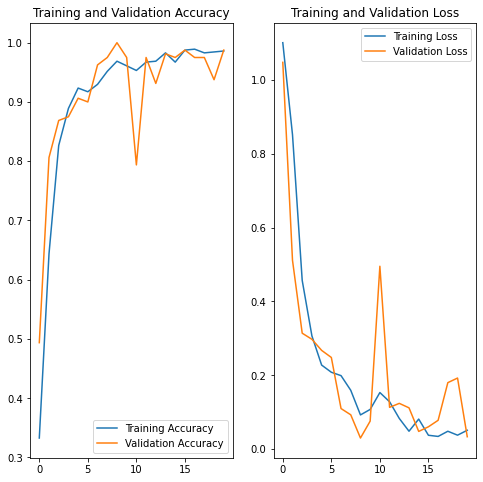

In [12]:
"""Memvisualisasikan hasil training model"""
accuracy = LOG.history['accuracy']
validation_accuracy = LOG.history['val_accuracy']

loss = LOG.history['loss']
validation_loss = LOG.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
"""Making the prediction"""

#code to uploading files

uploaded_files = files.upload()

print(uploaded_files)

Saving sample_rock_image.jpeg to sample_rock_image.jpeg
{'sample_rock_image.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\x01\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\xff\xc2\x00\x11\x08\x04\x84\x03c\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x000\x00\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x02\xf2Oc\xcf\xed\x8e_g\xc8\xf4\x93\xc5j\xa8cA\xa7e\x01c\x00\x00\xa0b\x00\x00\x16\x80\x0cL@\x17\xd3\xc6\xf3{\xdf\r\xe2\xf4\xe5V\xbcK\xab\x9b\xa6\x1

sample_rock_image.jpeg
rock


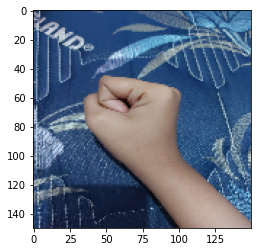

In [19]:
"""Processing the image to input it into model"""

for filename in uploaded_files.keys():

  path = filename
  Image = image.load_img(path, target_size = (150,150))

  # converting image data into array
  X = image.img_to_array(Image)
  X = np.expand_dims(X, axis = 0)

  Images = np.vstack([X])
  output_classes = Model.predict(Images, batch_size=10)

  # Tampil #
  image_plot = plt.imshow(Image)
  print(filename)
  #print(output_classes)
 #"""
  if output_classes[0,0]!=0:
    print('rock')
  elif output_classes[0,1]!=0:
    print('paper')
  else :
    print('scissors')
  
#"""